# Unit 3, Lesson 2, Assignment 6 Challenge: If a tree falls in the forest...
### Eve Ben Ezra

Challenge: To study the runtime of a dataset using Random Forest and a single Decision Tree. 

I will be using a dataset from Kaggle that I somewhat cleaned in a previous assignment about the [Top 5000 Youtube Channels](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade) to see if I can predict the grade of the channel using Random Forest and a single Decision Tree.

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
import scipy

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [26]:
data = pd.read_csv('cleaned_youtube_data.csv')
data.head()

,Unnamed: 0,Grade,Video Uploads,Subscribers,Video views
0,0,A++,82757,18752951,20869786591
1,1,A++,12661,61196302,47548839843
2,2,A++,373,19238251,9793305082
3,3,A++,27323,31180559,22675948293
4,4,A++,36756,32852346,26273668433


In [43]:
data.dtypes

Unnamed: 0        int64
Grade            object
Video Uploads     int64
Subscribers       int64
Video views       int64
best_grade        int64
dtype: object

# Decision Tree: Channel Grade

See if we can separate channels that are A++ from other grades

In [35]:
data['Grade'] = data['Grade'].astype(str)

In [44]:
data.dtypes

Unnamed: 0        int64
Grade            object
Video Uploads     int64
Subscribers       int64
Video views       int64
best_grade        int64
dtype: object

In [39]:
type(data['Grade'].iloc[0])

str

In [48]:
data['best_grade'] = data['Grade'].apply(lambda x: 1 if x.strip() == 'A++' else 0)

In [50]:
data

,Unnamed: 0,Grade,Video Uploads,Subscribers,Video views,best_grade
0,0,A++,82757,18752951,20869786591,1
1,1,A++,12661,61196302,47548839843,1
2,2,A++,373,19238251,9793305082,1
3,3,A++,27323,31180559,22675948293,1
4,4,A++,36756,32852346,26273668433,1
5,5,A++,30243,17149705,16618094724,1
6,6,A++,8500,11373567,23898730764,1
7,7,A++,100147,12149206,17202609850,1
8,8,A++,1140,16082927,24518098041,1
9,9,A++,74607,2841811,2591830307,1


In [51]:
data['best_grade'].value_counts()

0    4600
1      10
Name: best_grade, dtype: int64

This looks like it's not balanced enough to be used in a decision tree, so maybe we should do if the letter grade is an A or a B

In [113]:
# Reset the data

data = pd.read_csv('cleaned_youtube_data.csv')
data.head()

,Unnamed: 0,Grade,Video Uploads,Subscribers,Video views
0,0,A++,82757,18752951,20869786591
1,1,A++,12661,61196302,47548839843
2,2,A++,373,19238251,9793305082
3,3,A++,27323,31180559,22675948293
4,4,A++,36756,32852346,26273668433


In [114]:
data['Grade'].value_counts()

B+      2722
A-       941
A        897
A+        40
A++       10
Name: Grade, dtype: int64

In [115]:
# Strip the -, +, and ++ from the column

import re

#data['best_grade'] = data['Grade'].apply(lambda x: 1 if x.strip() == 'A++' else 0)

data['letter_grade'] = [re.sub('[^A-Za-z0-9]+', '', x) for x in data['Grade']]

In [116]:
data.head()

,Unnamed: 0,Grade,Video Uploads,Subscribers,Video views,letter_grade
0,0,A++,82757,18752951,20869786591,A
1,1,A++,12661,61196302,47548839843,A
2,2,A++,373,19238251,9793305082,A
3,3,A++,27323,31180559,22675948293,A
4,4,A++,36756,32852346,26273668433,A


In [117]:
data['letter_grade'].value_counts()

B    2722
A    1888
Name: letter_grade, dtype: int64

This is more balanced, at least. Now we'll make a categorical variable for whether or not the grade is an A or a B

In [118]:
features = pd.DataFrame

data['a_grade'] = data['letter_grade'].apply(lambda x: 1 if x.strip() == 'A' else 0)

In [119]:
features = data.copy()

In [120]:
features = data[['a_grade']]

# I couldn't figure out how to copy the a_grade column from data to features or get it in a new column
# Now delete the a_grade from data

data = data[['Video Uploads', 'Subscribers', 'Video views']]

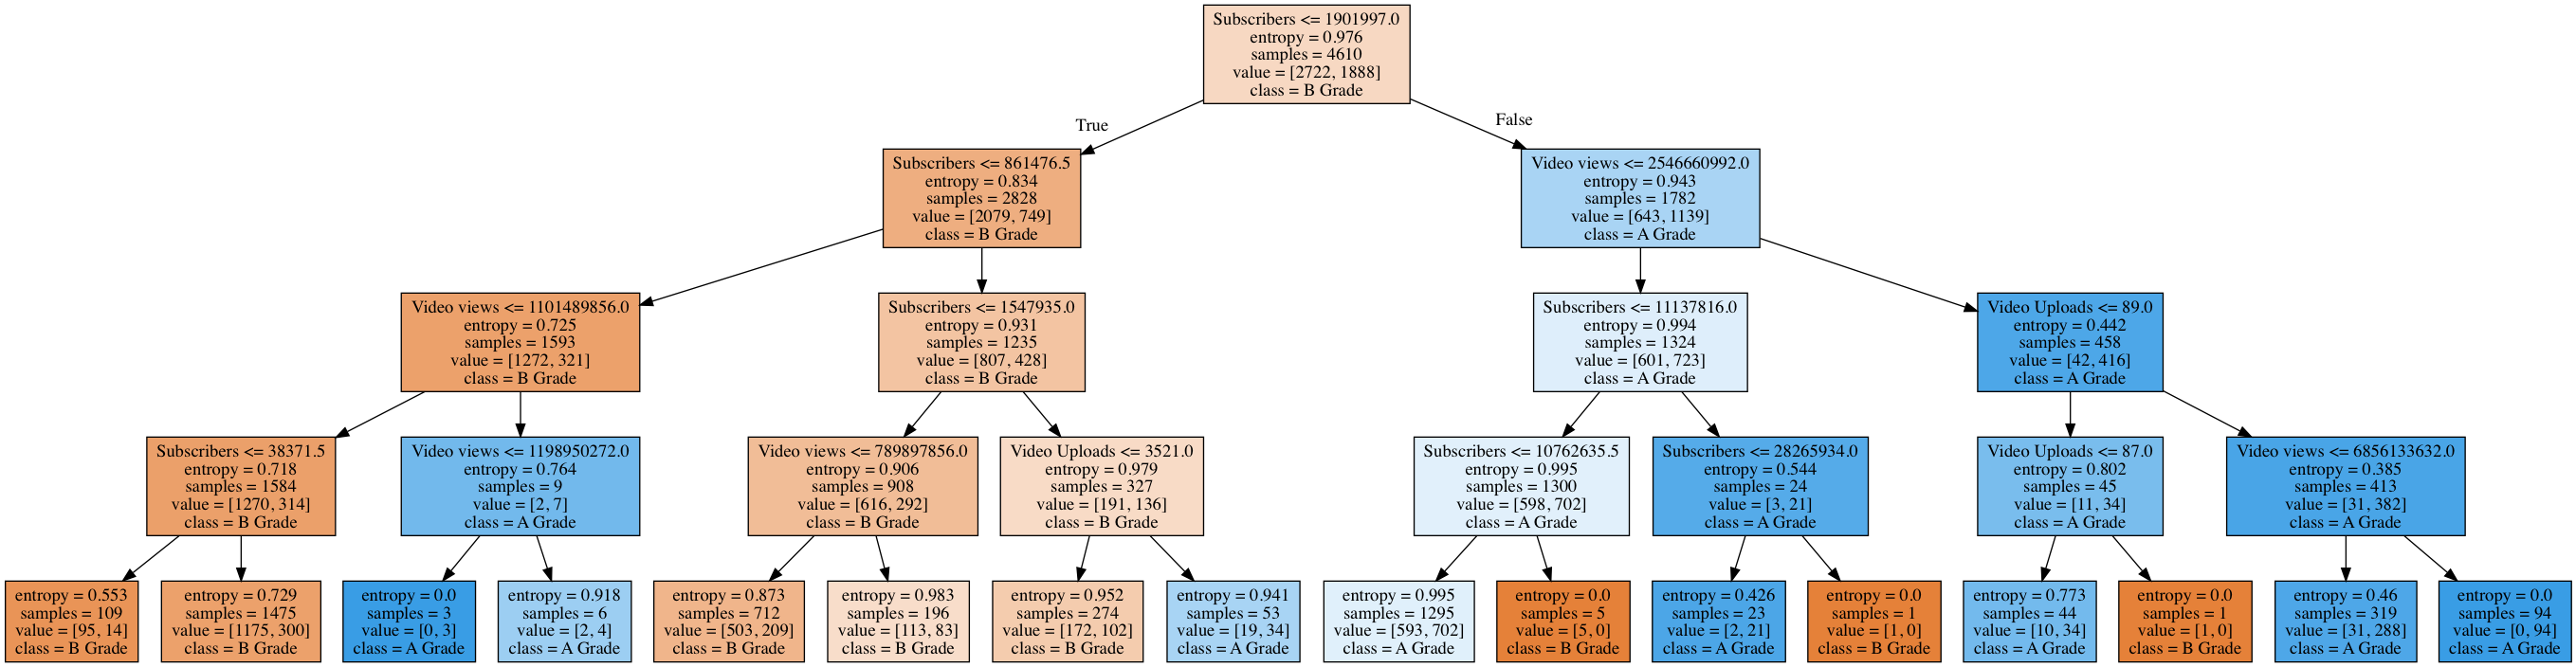

In [121]:
# Make the Decision Tree

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(data, features)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=data.columns,
    class_names=['B Grade', 'A Grade'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

We have some really high entropy here in the leaf nodes, so we'll try a few different things to see if we can't get it down.

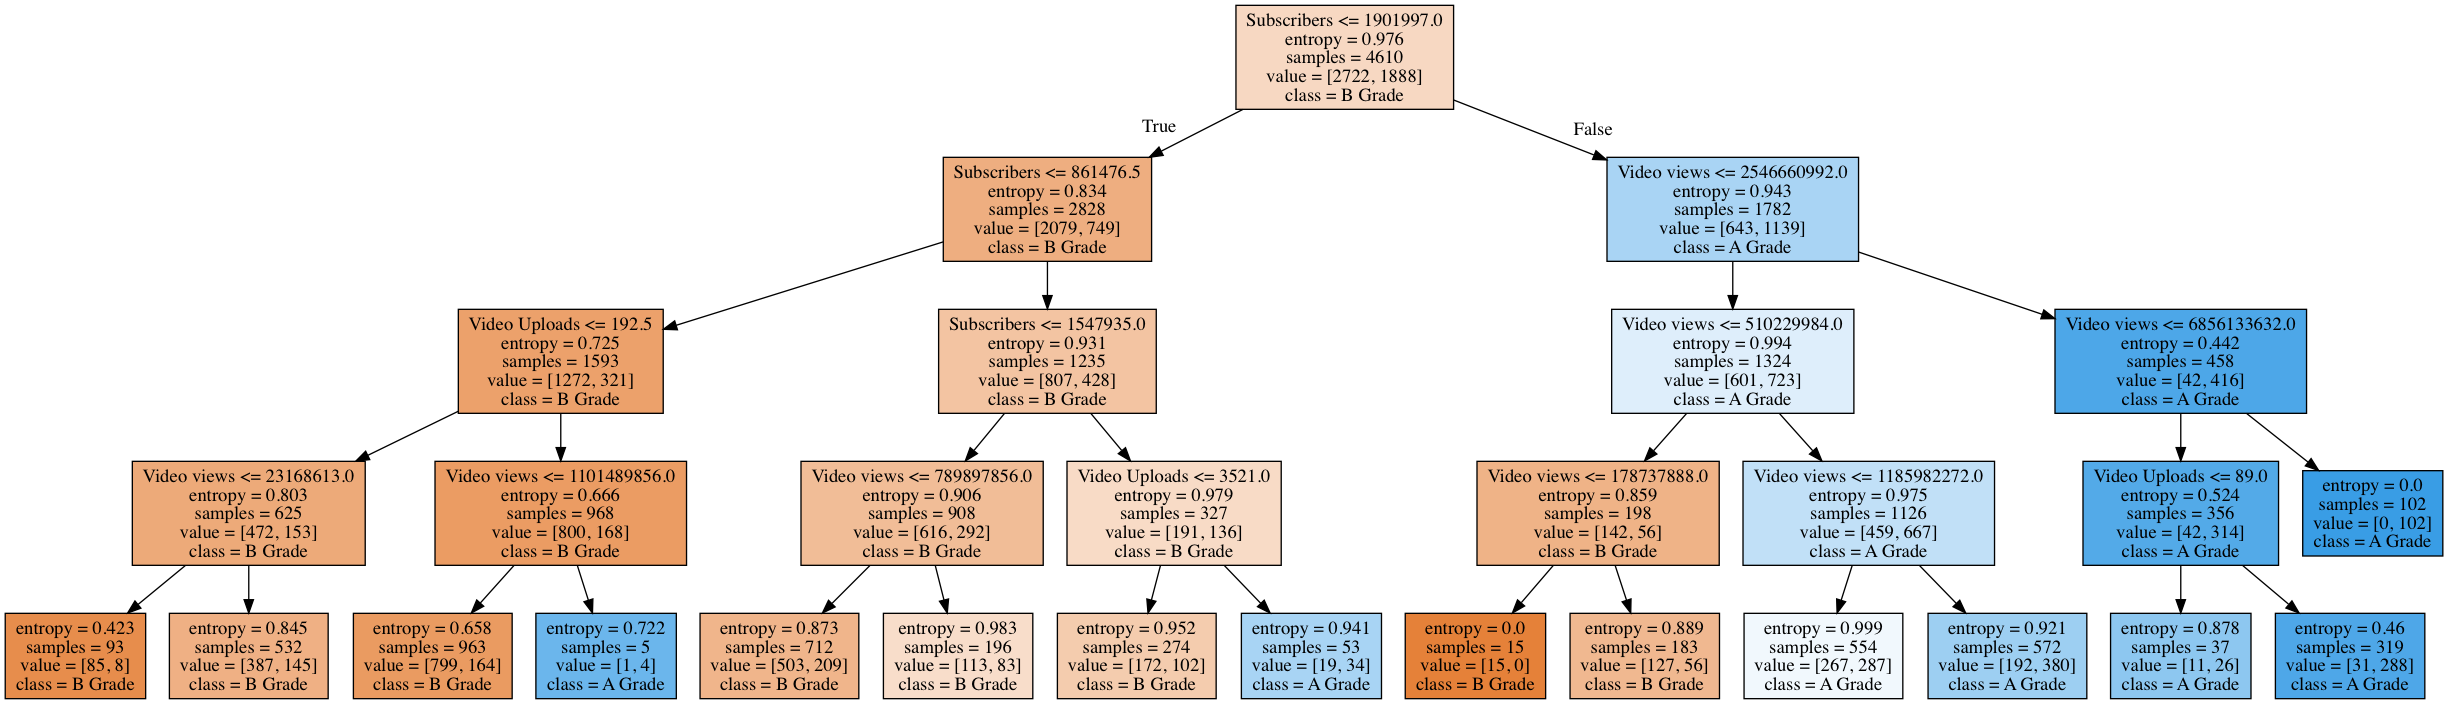

In [122]:
# Make the Decision Tree

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4,
)
decision_tree.fit(data, features)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=data.columns,
    class_names=['B Grade', 'A Grade'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [123]:
# Try without the 'Video Uploads' feature

data = data[['Subscribers', 'Video views']]

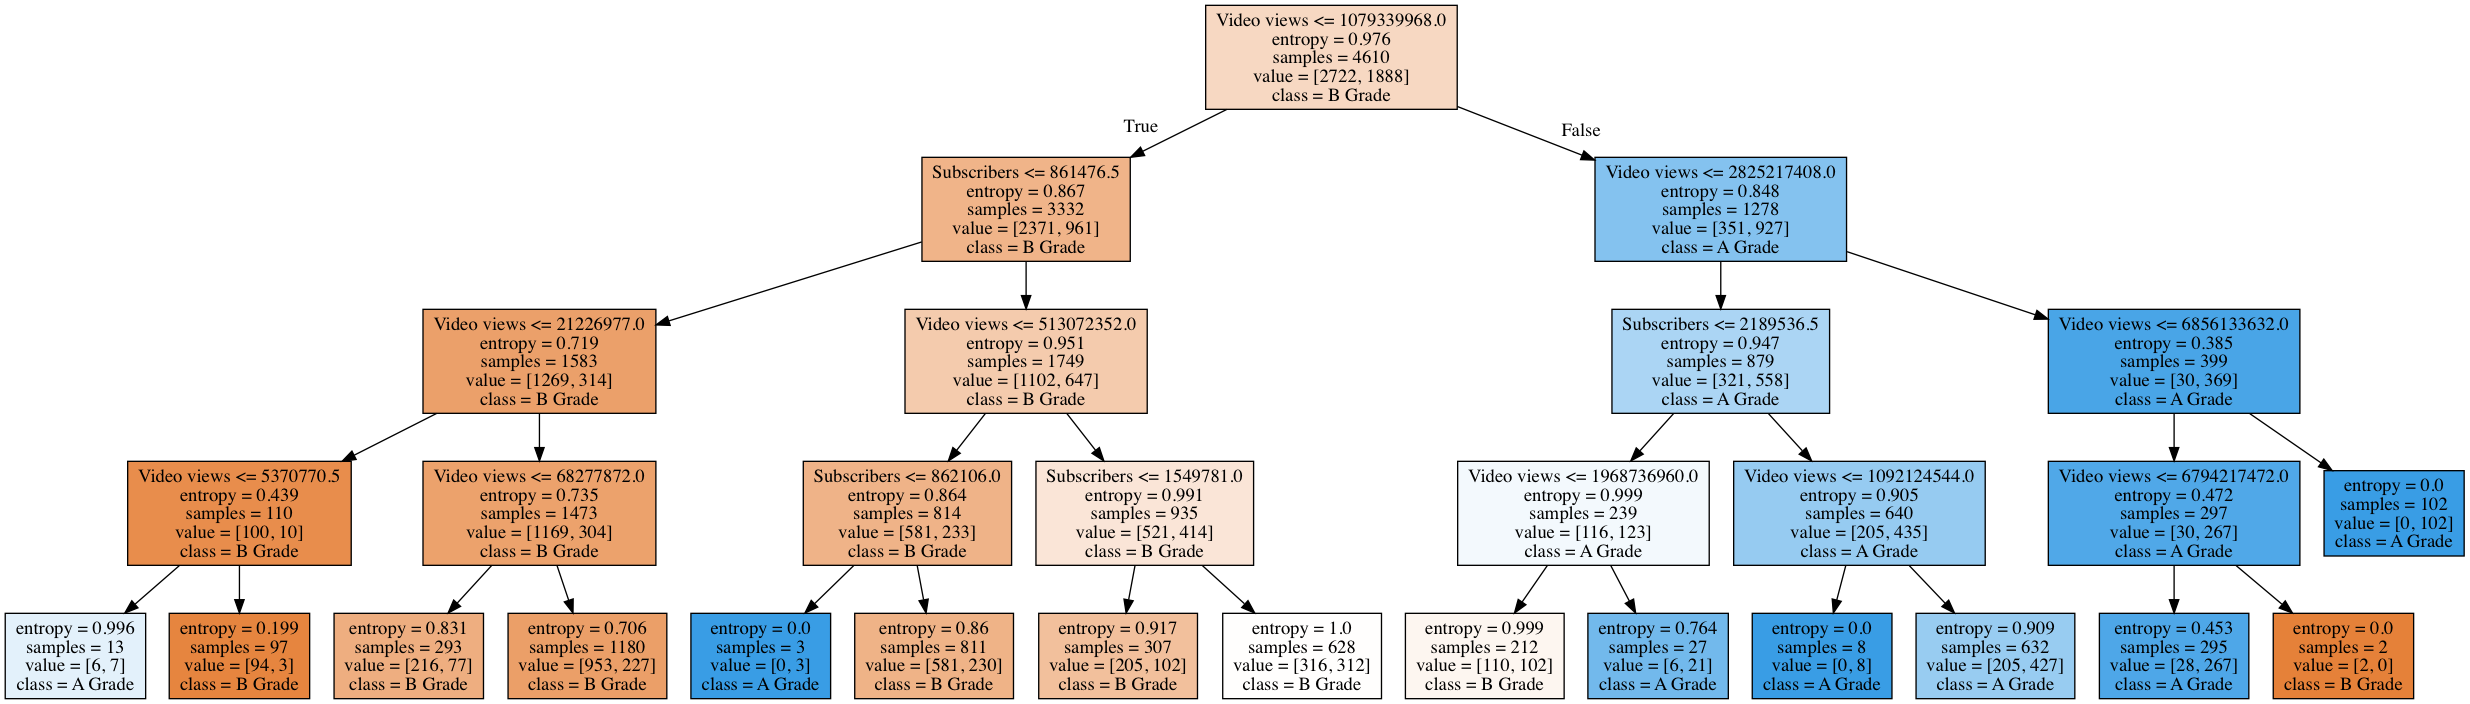

In [124]:
# Make the Decision Tree

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4,
)
decision_tree.fit(data, features)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=data.columns,
    class_names=['B Grade', 'A Grade'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

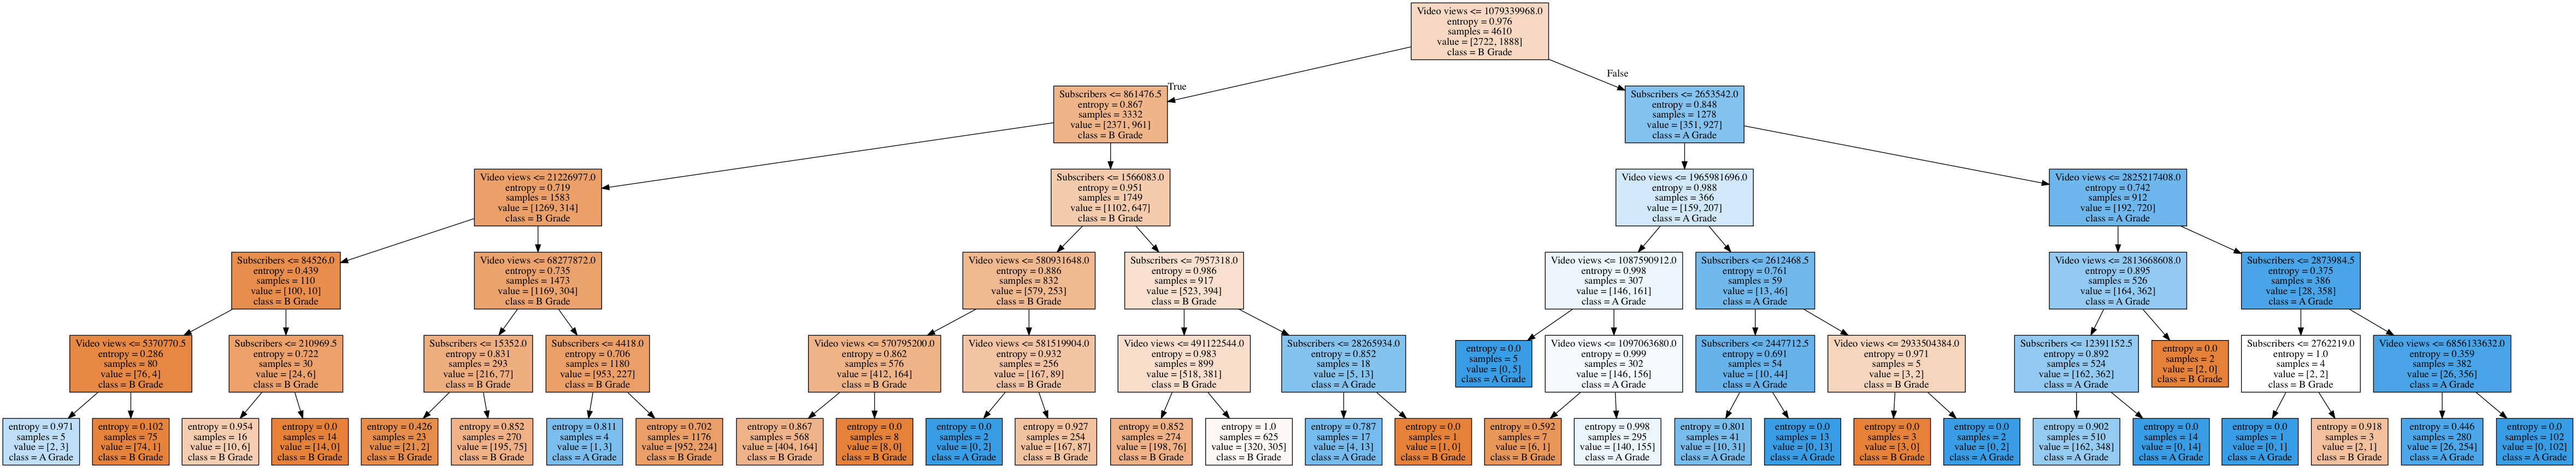

<Figure size 1440x1280 with 0 Axes>

In [127]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# Make the Decision Tree

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
)
decision_tree.fit(data, features)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=data.columns,
    class_names=['B Grade', 'A Grade'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest: Channel Grade

In [131]:
# Start over with the data

data = pd.read_csv('cleaned_youtube_data.csv')
data.head()

,Grade,Video Uploads,Subscribers,Video views
0,A++,82757,18752951,20869786591
1,A++,12661,61196302,47548839843
2,A++,373,19238251,9793305082
3,A++,27323,31180559,22675948293
4,A++,36756,32852346,26273668433


In [132]:
pd.get_dummies(data)

,Video Uploads,Subscribers,Video views,Grade_A,Grade_A+,Grade_A++,Grade_A-,Grade_B+
0,82757,18752951,20869786591,0,0,1,0,0
1,12661,61196302,47548839843,0,0,1,0,0
2,373,19238251,9793305082,0,0,1,0,0
3,27323,31180559,22675948293,0,0,1,0,0
4,36756,32852346,26273668433,0,0,1,0,0
5,30243,17149705,16618094724,0,0,1,0,0
6,8500,11373567,23898730764,0,0,1,0,0
7,100147,12149206,17202609850,0,0,1,0,0
8,1140,16082927,24518098041,0,0,1,0,0
9,74607,2841811,2591830307,0,0,1,0,0


In [133]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = data.drop('Grade', 1)
Y = data['Grade']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.58315335, 0.5952381 , 0.59002169, 0.61605206, 0.61605206,
       0.59652928, 0.59002169, 0.57608696, 0.57608696, 0.60434783])

These are not fantasic scores. I do want to look at the correlation matrix to see if we have any features that are highly correlated 

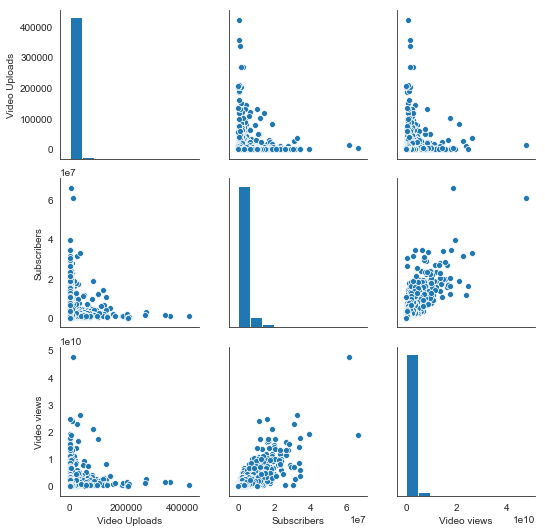

In [134]:
sns.pairplot(data)
plt.show()

In [136]:
data = data.drop(['Video Uploads'], axis=1)

In [137]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = data.drop('Grade', 1)
Y = data['Grade']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.587473  , 0.56060606, 0.57700651, 0.61171367, 0.57700651,
       0.57266811, 0.58785249, 0.57391304, 0.55217391, 0.57391304])

Dropping the video uploads data did seem to make the cross validation scores a little more uniform,. We're getting 56-58% accuracy across using Random Forest. 

### Further exploration: with PCA

We'll do a little PCA, even though we don't have many features to choose from to begin with

In [138]:
# Your code here.
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [139]:
#Normalize data
X_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [148]:
components = 2
pca = PCA(n_components=components)
pca.fit_transform(X_scaled);

In [149]:
pca_components = pd.DataFrame(pca.components_,columns=X_scaled.columns,index = range(components))
pca_components = np.abs(pca_components)
top_components = set()
for index, row in pca_components.iterrows():
    top_row = row.sort_values(ascending=False)[:2]
    top_components.update(list(top_row.index))
X_components = X[list(top_components)]
print ("Keeping {} features".format(len(top_components)))
print (sorted(top_components))

Keeping 2 features
['Subscribers', 'Video views']


In [150]:
rfc = ensemble.RandomForestClassifier()
Y = data['Grade']

cross_val_score(rfc, X_components, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.58963283, 0.53896104, 0.57483731, 0.5813449 , 0.57700651,
       0.54880694, 0.57049892, 0.55217391, 0.56956522, 0.59565217])

This actually brought our accuracy down

After thoughts: This dataset doesn't have a ton of features, as well it isn't very balanced data, especially for random forest. Because we only have 10 A++ entries, and over 2000 B+ entries.

I think another way we could do this would be to severely limit the dataset by only putting in 10 of each grade and seeing what it does. We might be able to do this by randomly pulling 10 entries into a copied dataframe, but I don't actually know how to go about doing this. 